In [1]:
import numpy as np
np.random.seed(2021) # set a constant seed to get same random matrixs
A = np.random.rand(500, 100)
x_ = np.zeros([100, 1])
x_[:5, 0] += np.array([i+1 for i in range(5)]) # x_ denotes expected x
b = np.matmul(A, x_) + np.random.randn(500, 1) * 0.1 # add a noise to b
lam = 10 # try some different values in {0.1, 1, 10}

In [2]:
def sign(x):
    #define sign function
    sign=np.zeros(x_.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            if x[i][j]>0:
                sign[i][j]=1
            elif x[i][j]==0:
                sign[i][j]=0
            else:
                sign[i][j]=-1
    return sign
def f(A,x,b,lambdaa):
    f=1/2*np.linalg.norm(np.dot(A,x)-b,ord=2)**2+lambdaa*np.linalg.norm(x,ord=1)
    return f
def g(A,x,b,lambdaa):
    gtemp=np.dot(A.T,np.dot(A,x)-b)+lambdaa*sign(x)
    return gtemp

In [3]:
def sub_des_alg(A,x0,b,alpha,lambdaa,max_buchang):
    """
subgradient descent algorithm,return a tuple contains fk_mao and a list with f of each step which have a length of max_buchang ,respectively
if alpha>0,then choose stable step size=alpha
if alpha==0,then choose Vanishing step=0.002/sqrt(k),respectively   
    """ 
    x=x0
    print("This is subgradient descent algorithm",end=",")
    if alpha>0:
        print("alpha=",alpha)
    elif alpha==0:
        print("Vanishing step=0.002/sqrt(k)")
    print("Choose lambdaa=",lambdaa)
    fk_mao=f(A,x,b,lambdaa)#minist fk in algorithm
    fk=fk_mao
    f_list=[fk]
    k=0
    if alpha>0:
        while k<max_buchang:
            k=k+1
            x=x-alpha*g(A,x,b,lambdaa)
            fk=f(A,x,b,lambdaa)
            f_list.append(fk)
            if fk<fk_mao:
                fk_mao=fk
    elif alpha==0:
        while k<max_buchang:
            k=k+1
            alpha=0.002/np.sqrt(k)
            x=x-alpha*g(A,x,b,lambdaa)
            fk=f(A,x,b,lambdaa)
            f_list.append(fk)
            if fk<fk_mao:
                fk_mao=fk
    print("The answer is:",fk_mao)
    return (fk_mao,f_list)

In [4]:
def max_single(A):
#return max single value of A
    return max(np.linalg.eig(np.dot(A.T,A))[0])
def z(A,x,b):
    single_val=max_single(A)
    z=np.dot(np.eye(len(x))-np.dot(A.T,A)/single_val,x)+np.dot(A.T,b)/single_val
    return z
def shrink_z(z,lambdaa,A):
    temp=abs(z)-lambdaa/max_single(A)
    for i in range(0,len(temp)):
        if temp[i]>=0:
            temp[i]=temp[i]
        else:
            temp[i]=0
    return temp
def prox(A,x,b,lambdaa,max_buchang):
    """
proximal gradient descent algorithm,
return a tuple contains fk_mao and a list with f of each step which have a length of max_buchang, respectively
    """
    print("This is proximal gradient descent algorithm")
    k=0
    fk_mao=f(A,x,b,lambdaa)
    fk=fk_mao
    f_list=[fk]
    while k<max_buchang:
        k=k+1
        z_ans=z(A,x,b)
        x=sign(z_ans)*shrink_z(z_ans,lambdaa,A)
        fk=f(A,x,b,lambdaa)
        f_list.append(fk)
        if fk<fk_mao:
            fk_mao=fk
    return (fk_mao,f_list)

In [5]:
#when lambdaa=1,
import matplotlib.pyplot as plt
x0 = np.zeros([100, 1])
ans_11=sub_des_alg(A,x0,b,alpha=0.0005,lambdaa=1,max_buchang=3000)[1]
ans_12=sub_des_alg(A,x0,b,alpha=0.0002,lambdaa=1,max_buchang=3000)[1]
ans_13=sub_des_alg(A,x0,b,alpha=0.0001,lambdaa=1,max_buchang=3000)[1]
ans_14=sub_des_alg(A,x0,b,alpha=0,lambdaa=1,max_buchang=3000)[1]
ans_15=prox(A,x0,b,lambdaa=1,max_buchang=3000)[1]
f_star1=f(A,x_,b,lambdaa=1)
chazhi_11=[]#compute Relative error
chazhi_12=[]
chazhi_13=[]
chazhi_14=[]
chazhi_15=[]
for i in range(0,3001):
    chazhi_11.append((ans_11[i]-f_star1)/f_star1)
    chazhi_12.append((ans_12[i]-f_star1)/f_star1)
    chazhi_13.append((ans_13[i]-f_star1)/f_star1)
    chazhi_14.append((ans_14[i]-f_star1)/f_star1)
    chazhi_15.append((ans_15[i]-f_star1)/f_star1)
buchang=np.arange(0,3001,1)

This is subgradient descent algorithm,alpha= 0.0005
Choose lambdaa= 1


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


The answer is: 15232.129684970603
This is subgradient descent algorithm,alpha= 0.0002
Choose lambdaa= 1
The answer is: 15232.129684970603
This is subgradient descent algorithm,alpha= 0.0001
Choose lambdaa= 1
The answer is: 17.38668161202591
This is subgradient descent algorithm,Vanishing step=0.002/sqrt(k)
Choose lambdaa= 1
The answer is: 15232.129684970603
This is proximal gradient descent algorithm


<Figure size 640x480 with 1 Axes>

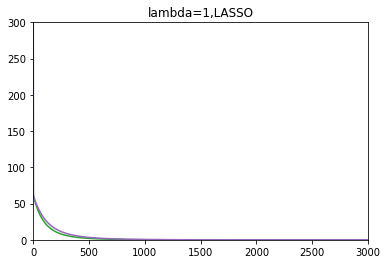

In [29]:
plt.title("lambda=1,LASSO")
plt.xlim((0,3001))
plt.ylim((0,300))
plt.plot(buchang,chazhi_11)
plt.plot(buchang,chazhi_12)
plt.plot(buchang,chazhi_13)
plt.plot(buchang,chazhi_14)
plt.plot(buchang,chazhi_15)
plt.show()

In [6]:
print(ans_11[0:100])

[15232.129684970603, 397216.0561821643, 11092231.30012761, 310494716.59951717, 8691998659.40623, 243324239300.107, 6811628573319.347, 190684990831141.06, 5338042848710401.0, 1.4943337307694816e+17, 4.1832434864666127e+18, 1.1710587605022587e+20, 3.278266314068935e+21, 9.177191092709487e+22, 2.569066338223021e+24, 7.1918540035992345e+25, 2.013290324175157e+27, 5.636012532218749e+28, 1.5777474754586507e+30, 4.41675223766079e+31, 1.2364272884170343e+33, 3.4612592178182957e+34, 9.689462118124405e+35, 2.7124716824227324e+37, 7.593303465403716e+38, 2.1256722380309879e+40, 5.950614886027649e+41, 1.665817377123672e+43, 4.663295452782384e+44, 1.3054446891105026e+46, 3.6544667898106376e+47, 1.0230328124379369e+49, 2.86388191635176e+50, 8.017161845729358e+51, 2.2443273129953995e+53, 6.282778350720582e+54, 1.7588033427976264e+56, 4.923600716045187e+57, 1.378314642754805e+59, 3.8584592130741575e+60, 1.0801385283987931e+62, 3.0237438731455826e+63, 8.464680010941888e+64, 2.3696057170709114e+66, 6.633

In [7]:
print(ans_12[0:100])

[15232.129684970603, 33633.82847225655, 75956.63653335659, 173435.7044221938, 397560.7281756093, 913120.0729172314, 2098645.9599454566, 4824951.256961002, 11094016.25434016, 25509630.989180643, 58657408.65390651, 134878369.08966833, 310141916.33883494, 713144492.1162132, 1639810086.1770134, 3770585912.424672, 8670089571.036938, 19935997090.10973, 45840789257.023415, 105406172456.49019, 242370571877.13495, 557305921032.6362, 1281466853700.9143, 2946599186228.254, 6775396730998.681, 15579315831986.053, 35823005819053.14, 82371250532853.9, 189404062977787.12, 435514801787873.0, 1001420660223867.2, 2302661888612030.0, 5294729751827354.0, 1.2174676295491088e+16, 2.799439248689221e+16, 6.4370172256517416e+16, 1.480124663134558e+17, 3.403391572730422e+17, 7.825742306798551e+17, 1.79944744346127e+18, 4.137640845596323e+18, 9.514071571600777e+18, 2.187661066894205e+19, 5.030297394232879e+19, 1.1566641769624517e+20, 2.6596280764461115e+20, 6.115536078552586e+20, 1.4062034409684607e+21, 3.2334174

In [8]:
print(ans_13[0:100])

[15232.129684970603, 2034.3337766816558, 1139.8059947321008, 1070.410592120642, 1056.128586290638, 1045.6284533144608, 1035.4870832354857, 1025.4750034844797, 1015.5756486455983, 1005.7866619005941, 996.1066493836541, 986.534297008433, 977.0683113921116, 967.7074157172538, 958.4503492585404, 949.2958671564246, 940.2427402098493, 931.2897546727892, 922.435712053563, 913.67942891683, 905.0197366882114, 896.4554814615103, 887.9855238084938, 879.6087385912008, 871.324014776741, 863.1302552545578, 855.0263766561103, 847.0113091769477, 839.0839964011531, 831.2433951281046, 823.4884752015391, 815.8182193408805, 808.231622974802, 800.7276940769973, 793.3054530041217, 785.9639323358814, 778.702176717241, 771.5192427027156, 764.4141986027291, 757.3861243319963, 750.4394678872283, 743.5749770662593, 736.7845527872216, 730.067321606941, 723.4253613658728, 716.8628105578078, 710.3707115327039, 703.9482361252182, 697.5945676374788, 691.3088995705095, 685.0904354185022, 678.9383885355412, 672.8519820

In [9]:
print(ans_14[0:100])

[15232.129684970603, 8262761.426253322, 2330027749.2893143, 426429938455.672, 57201274448769.914, 6013900819026698.0, 5.1713325690187354e+17, 3.7459697962819486e+19, 2.3359256766725782e+21, 1.2749796851781035e+23, 6.17173151482908e+24, 2.6779545838467956e+26, 1.0508183035467749e+28, 3.756725773181154e+29, 1.231418067733428e+31, 3.721321070070027e+32, 1.0417480248864325e+34, 2.7128895902056655e+35, 6.596739213564942e+36, 1.502813966357281e+38, 3.2170977160355814e+39, 6.48911615585328e+40, 1.236346805580193e+42, 2.2300061620408107e+43, 3.815737541198885e+44, 6.205565865727164e+45, 9.608929326260778e+46, 1.418937164065011e+48, 2.001241043322096e+49, 2.6995548043511765e+50, 3.4874604890456594e+51, 4.319983923284378e+52, 5.1369907436943535e+53, 5.870258865362071e+54, 6.45309524005901e+55, 6.830565770933895e+56, 6.968117740571999e+57, 6.856709668440121e+58, 6.5134236001386105e+59, 5.9776433431935435e+60, 5.30389590164938e+61, 4.5530885051373e+62, 3.783996973640559e+63, 3.0465142809345626e+64

In [10]:
print(ans_15[0:100])

[15232.129684970603, 1089.456360203873, 1081.015181340925, 1072.649213693194, 1064.3577353360247, 1056.1400316005033, 1047.9953949982328, 1039.9231251469116, 1031.9225286966987, 1023.9929192573594, 1016.1336173261853, 1008.3439502166776, 1000.6232519879858, 992.9708633750931, 985.3861317197451, 977.868410902105, 970.4170612731381, 963.0314495877072, 955.710948938382, 948.4549386899379, 941.2628044145653, 934.1339378277471, 927.0677367248255, 920.0636049182345, 913.1209521753979, 906.2391941572827, 899.4177523576037, 892.6560540426683, 885.9535321918576, 879.309625438737, 872.7237780127883, 866.195439681754, 859.7240656945952, 853.3091167250492, 846.95005881578, 840.6463633231225, 834.3975068624063, 828.2029712538572, 822.0622434690679, 815.9748155780362, 809.9401846967555, 803.9578529353635, 798.0273273468331, 792.1481198762043, 786.3197473103529, 780.5417312282847, 774.8135979519548, 769.1348784976042, 763.5051085276075, 757.9238283028286, 752.3988263584032, 746.922955324869, 741.4940

This is subgradient descent algorithm,alpha= 0.0005
Choose lambdaa= 0.1


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


The answer is: 15232.129684970603
This is subgradient descent algorithm,alpha= 0.0002
Choose lambdaa= 0.1
The answer is: 15232.129684970603
This is subgradient descent algorithm,alpha= 0.0001
Choose lambdaa= 0.1
The answer is: 3.5928416598330624
This is subgradient descent algorithm,Vanishing step=0.002/sqrt(k)
Choose lambdaa= 0.1
The answer is: 15232.129684970603
This is proximal gradient descent algorithm


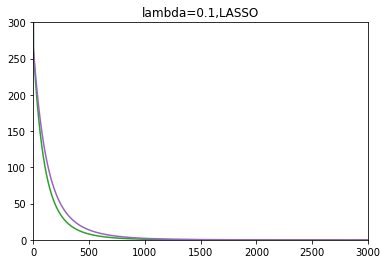

In [11]:
#when lambda=0.1
ans_21=sub_des_alg(A,x0,b,alpha=0.0005,lambdaa=0.1,max_buchang=3000)[1]
ans_22=sub_des_alg(A,x0,b,alpha=0.0002,lambdaa=0.1,max_buchang=3000)[1]
ans_23=sub_des_alg(A,x0,b,alpha=0.0001,lambdaa=0.1,max_buchang=3000)[1]
ans_24=sub_des_alg(A,x0,b,alpha=0,lambdaa=0.1,max_buchang=3000)[1]
ans_25=prox(A,x0,b,lambdaa=0.1,max_buchang=3000)[1]
f_star2=f(A,x_,b,lambdaa=0.1)
chazhi_21=[]
chazhi_22=[]
chazhi_23=[]
chazhi_24=[]
chazhi_25=[]
for i in range(0,3001):
    chazhi_21.append((ans_21[i]-f_star2)/f_star2)
    chazhi_22.append((ans_22[i]-f_star2)/f_star2)
    chazhi_23.append((ans_23[i]-f_star2)/f_star2)
    chazhi_24.append((ans_24[i]-f_star2)/f_star2)
    chazhi_25.append((ans_25[i]-f_star2)/f_star2)
#plt.subplot(1,3,2)
plt.title("lambda=0.1,LASSO")
plt.xlim((0,3001))
plt.ylim((0,300))
plt.plot(buchang,chazhi_21)
plt.plot(buchang,chazhi_22)
plt.plot(buchang,chazhi_23)
plt.plot(buchang,chazhi_24)
plt.plot(buchang,chazhi_25)
#plt.legend('alpha=0.0005','alpha=0.0002','alpha=0.0001','alpha=0.002/sqrt(k)','proximal gradient descent algorithm')
plt.show()

In [12]:
print(ans_21[0:100])

[15232.129684970603, 397131.167855201, 11089490.52520755, 310413602.0604447, 8689707174.967216, 243259979091.5835, 6809829078871.343, 190634612582295.53, 5336632541534895.0, 1.4939389279694368e+17, 4.1821382735540357e+18, 1.1707493667578212e+20, 3.2774001960400275e+21, 9.17476647862352e+22, 2.568387590840314e+24, 7.1899539156141106e+25, 2.0127584128274434e+27, 5.634523497584375e+28, 1.5773306345410992e+30, 4.4155853316229235e+31, 1.2361006243003708e+33, 3.460344753057188e+34, 9.68690216202071e+35, 2.7117550473448643e+37, 7.591297314461955e+38, 2.125110635379173e+40, 5.949042733444514e+41, 1.665377268136174e+43, 4.662063410021686e+44, 1.3050997905950669e+46, 3.653501279604778e+47, 1.0227625271464984e+49, 2.863125278686775e+50, 8.015043711394234e+51, 2.243734361670181e+53, 6.281118440542802e+54, 1.758338666915962e+56, 4.922299900628238e+57, 1.3779504919960205e+59, 3.8574398080656054e+60, 1.079853155775948e+62, 3.022944999948113e+63, 8.462443642297715e+64, 2.3689796671885938e+66, 6.631730

In [13]:
print(ans_22[0:100])

[15232.129684970603, 33599.87314147124, 75860.98360349881, 173077.0354281717, 396637.6504147593, 910736.3253917411, 2092880.6767229182, 4811151.6901323255, 11061574.374342177, 25433843.705431335, 58481450.399860166, 134471091.67906976, 309201472.99923754, 710975936.9571187, 1634814576.5390565, 3759085283.1710835, 8643623994.86091, 19875110187.014038, 45700737664.19973, 105084064778.20612, 241629807353.81763, 555602441187.1836, 1277549623463.8152, 2937591536196.7217, 6754683992991.244, 15531688165582.879, 35713489632623.24, 82119427478075.33, 188825019127192.03, 434183346391731.56, 998359110873331.4, 2295622165789391.5, 5278542630327196.0, 1.2137455680695874e+16, 2.790880754528478e+16, 6.417337859355022e+16, 1.475599598187556e+17, 3.392986658710011e+17, 7.801817295257354e+17, 1.7939461374459681e+18, 4.1249911683948554e+18, 9.484984963644776e+18, 2.180972906066234e+19, 5.0149186690522956e+19, 1.1531280002253732e+20, 2.6514970085327186e+20, 6.096839539825747e+20, 1.401904367787298e+21, 3.

In [14]:
print(ans_23[0:100])

[15232.129684970603, 2017.356111289, 1126.0830598705668, 1056.9041019416982, 1042.6360124123364, 1032.1363016119824, 1021.9944607264142, 1011.9818571280657, 1002.0819813302139, 992.2924801811128, 982.611959997987, 973.0391066457294, 963.5726266777187, 954.2112432121307, 944.9536954596274, 935.7987384970869, 926.7451430603189, 917.7916953406066, 908.9371967840241, 900.180463893429, 891.5203280330842, 882.9556352358783, 874.4852460131071, 866.1080351667812, 857.8228916044254, 849.6287181563387, 841.5244313952759, 833.5089614585271, 825.581251872353, 817.7402593787485, 809.9849537645065, 802.3143176925439, 794.7273465354648, 787.2230482113268, 779.8004430215857, 772.4585634911801, 765.1964542107387, 758.0131716808743, 750.9077841585333, 743.8793715053848, 736.9275467480608, 730.0516406357782, 723.2499955833239, 716.521736684384, 709.8662788078676, 703.2833326883749, 696.7711933986196, 690.3290289684284, 683.9560177592446, 677.6513483201228, 671.4142192560871, 665.2438390989233, 659.139426

In [15]:
print(ans_24[0:100])

[15232.129684970603, 8262421.872945469, 2329924856.357919, 426410956871.6951, 57198726546761.88, 6013632925757481.0, 5.171102206889219e+17, 3.7458029282095686e+19, 2.3358216204529183e+21, 1.274922889891592e+23, 6.171456588675785e+24, 2.6778352915945496e+26, 1.0507714937603458e+28, 3.75655842595231e+29, 1.2313632129440105e+31, 3.72115529998024e+32, 1.041701619144931e+34, 2.7127687417374788e+35, 6.596445355004734e+36, 1.5027470219573105e+38, 3.216954407095774e+39, 6.488827091473313e+40, 1.2362917312350593e+42, 2.229906824113568e+43, 3.815567565229896e+44, 6.205289432387668e+45, 9.60850128658155e+46, 1.4188739560438119e+48, 2.0011518959732952e+49, 2.6994345498947967e+50, 3.4873051365169456e+51, 4.3197914851396027e+52, 5.136761911137102e+53, 5.869997368619152e+54, 6.452807780267931e+55, 6.830261496328233e+56, 6.967807338571814e+57, 6.856404229227551e+58, 6.513133452958437e+59, 5.977377062898174e+60, 5.30365963412952e+61, 4.552885683108219e+62, 3.7838284115879296e+63, 3.046378570810021e+64,

In [16]:
print(ans_25[0:100])

[15232.129684970603, 1075.9663248488723, 1067.5246994377526, 1059.1582897979877, 1050.866373970599, 1042.6482372525218, 1034.5031721213863, 1026.4304781610904, 1018.429461988168, 1010.4994371789353, 1002.6397241974095, 994.8496503239928, 987.128549584914, 979.4757626824093, 971.8906369256557, 964.3725261624236, 956.9207907114635, 949.5347972955987, 942.2139189755366, 934.9575350843695, 927.7650311627793, 920.6357988949185, 913.5692360449758, 906.5647463944092, 899.6217396798435, 892.7396315316236, 885.9178434130197, 879.1558025600692, 872.452941922063, 865.8087001026508, 859.222521301575, 852.6938552570151, 846.2221571885469, 839.8068877406959, 833.4475129270904, 827.1435040752046, 820.8943377716844, 814.6994958082433, 808.5584651281395, 802.4707377732074, 796.4358108314532, 790.4531863851996, 784.5223714597773, 778.6428779727573, 772.8142226837195, 767.0359271445446, 761.3075176502348, 755.6285251902481, 749.9984854003486, 744.4169385149586, 738.8842681670966, 733.3993531286454, 727.9

This is subgradient descent algorithm,alpha= 0.0005
Choose lambdaa= 10


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


The answer is: 15232.129684970603
This is subgradient descent algorithm,alpha= 0.0002
Choose lambdaa= 10
The answer is: 15232.129684970603
This is subgradient descent algorithm,alpha= 0.0001
Choose lambdaa= 10
The answer is: 152.00991981602715
This is subgradient descent algorithm,Vanishing step=0.002/sqrt(k)
Choose lambdaa= 10
The answer is: 15232.129684970603
This is proximal gradient descent algorithm


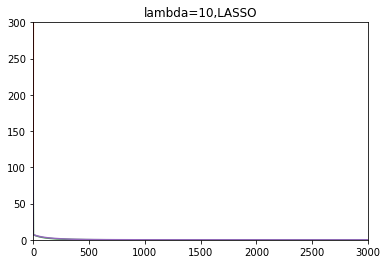

In [17]:
#when lambda=10
ans_31=sub_des_alg(A,x0,b,alpha=0.0005,lambdaa=10,max_buchang=3000)[1]
ans_32=sub_des_alg(A,x0,b,alpha=0.0002,lambdaa=10,max_buchang=3000)[1]
ans_33=sub_des_alg(A,x0,b,alpha=0.0001,lambdaa=10,max_buchang=3000)[1]
ans_34=sub_des_alg(A,x0,b,alpha=0,lambdaa=10,max_buchang=3000)[1]
ans_35=prox(A,x0,b,lambdaa=10,max_buchang=3000)[1]
f_star3=f(A,x_,b,lambdaa=10)
chazhi_31=[]
chazhi_32=[]
chazhi_33=[]
chazhi_34=[]
chazhi_35=[]
for i in range(0,3001):
    chazhi_31.append((ans_31[i]-f_star3)/f_star3)
    chazhi_32.append((ans_32[i]-f_star3)/f_star3)
    chazhi_33.append((ans_33[i]-f_star3)/f_star3)
    chazhi_34.append((ans_34[i]-f_star3)/f_star3)
    chazhi_35.append((ans_35[i]-f_star3)/f_star3)
#plt.figure(1)
#plt.subplot(1,3,3)
plt.title("lambda=10,LASSO")
plt.xlim((0,3001))
plt.ylim((0,300))
plt.plot(buchang,chazhi_31)
plt.plot(buchang,chazhi_32)
plt.plot(buchang,chazhi_33)
plt.plot(buchang,chazhi_34)
plt.plot(buchang,chazhi_35)
#plt.legend('alpha=0.0005','alpha=0.0002','alpha=0.0001','alpha=0.002/sqrt(k)','proximal gradient descent algorithm')
plt.show()

In [18]:
print(ans_31[0:100])

[15232.129684970603, 398064.9394517971, 11119657.509376477, 311306444.2618471, 8714930118.786875, 243967308139.7436, 6829636592751.985, 191189139385847.9, 5352156168378758.0, 1.498284627587405e+17, 4.1943036465776164e+18, 1.174154946144024e+20, 3.286933787970457e+21, 9.201454851931725e+22, 2.5758587441411576e+24, 7.210868690364842e+25, 2.0186133027651e+27, 5.650913698573904e+28, 1.581918913592234e+30, 4.428429777316123e+31, 1.2396963032755799e+33, 3.4704105103514894e+34, 9.715080280981372e+35, 2.719643240601924e+37, 7.61337955243802e+38, 2.1312923454126492e+40, 5.966347835843735e+41, 1.6702216650332434e+43, 4.6756248329794566e+44, 1.3088961804563256e+46, 3.664128907711029e+47, 1.0257376293697273e+49, 2.871453791079351e+50, 8.038358580420162e+51, 2.2502611349049848e+53, 6.299389514170185e+54, 1.7634534781632273e+56, 4.936618322538565e+57, 1.3819587964297717e+59, 3.8686606706259174e+60, 1.0829943282761495e+62, 3.0317384101008444e+63, 8.487059947868069e+64, 2.3758707650608445e+66, 6.65102

In [19]:
print(ans_32[0:100])

[15232.129684970603, 33973.38178010967, 76917.18863965625, 177041.06507247034, 406852.051501896, 937126.7973896594, 2156736.829815488, 4964031.568089455, 11421049.805405123, 26273702.56342475, 60431530.507061906, 138985011.77609226, 319624892.9024619, 735011658.5906438, 1690184326.5191324, 3886558320.4679413, 8936970362.614334, 20549987728.075836, 47253089951.55205, 108654359463.09561, 249840573018.14526, 574484128857.8735, 1320968954104.6572, 3037434088091.1807, 6984268075333.295, 16059602709781.002, 36927388978196.14, 84910684828390.89, 195243257805315.8, 448941466598660.06, 1032293942088211.1, 2373651875990098.5, 5457963957165278.0, 1.2550016501116136e+16, 2.8857448346577616e+16, 6.63546793578476e+16, 1.5257563333842336e+17, 3.508316830515671e+17, 8.067006963124e+17, 1.8549237262396288e+18, 4.2652027495778724e+18, 9.807386810628813e+18, 2.255105833748465e+19, 5.185379570198675e+19, 1.1923236985793521e+20, 2.7416234102756613e+20, 6.304075757562924e+20, 1.4495561646717172e+21, 3.33310

In [20]:
print(ans_33[0:100])

[15232.129684970603, 2204.110430608215, 1276.7045452779134, 1205.1221724846569, 1190.6990342933234, 1180.1940844230253, 1170.0569229083949, 1160.0495924903446, 1150.1549627363966, 1140.3706397410765, 1130.6952277399807, 1121.1274130902232, 1111.6659030048982, 1102.3094212689662, 1093.056707756245, 1083.906518202412, 1074.857623997666, 1065.9088119832604, 1057.058884250811, 1048.3066579442827, 1039.6509650646094, 1031.0906522769133, 1022.6245807202773, 1014.2516258200571, 1005.9706771026783, 997.7806380128948, 989.6804257334752, 981.6689710072827, 973.745217961711, 965.9081239354564, 958.1566593075813, 950.4898073288489, 942.9065639552897, 935.4059376839775, 927.9869493909757, 920.6486321714374, 913.3900311818161, 906.2102034841691, 899.1082178925194, 892.0860841510051, 885.226002259986, 878.4393302791389, 871.7250803039457, 865.0823959619513, 858.5552479175547, 852.1268159455967, 845.7659684134377, 839.4717950225981, 833.2435155381717, 827.0803672392894, 820.9815973034597, 814.94646218

In [21]:
print(ans_34[0:100])

[15232.129684970603, 8266156.959331853, 2331056803.2443, 426619777530.95306, 57226756589909.914, 6016580079897028.0, 5.173636472517157e+17, 3.74763868142629e+19, 2.3369663663425252e+21, 1.2755477076198847e+23, 6.174481113158382e+24, 2.6791476525073965e+26, 1.0512864587550715e+28, 3.7583994504771594e+29, 1.231966682827075e+31, 3.722978974043374e+32, 1.0422121391504705e+34, 2.7140982229320984e+35, 6.599678159156408e+36, 1.5034834923667583e+38, 3.218530980993276e+39, 6.492007153769274e+40, 1.2368976164999753e+42, 2.2309996630064686e+43, 3.817437509116647e+44, 6.208330537764849e+45, 9.61321024742014e+46, 1.4195693217095513e+48, 2.002132626019444e+49, 2.700757496231864e+50, 3.489014204646333e+51, 4.3219085404771346e+52, 5.139279349596578e+53, 5.872874153136015e+54, 6.455970190120415e+55, 6.8336088897399935e+56, 6.971222140829692e+57, 6.859764434742026e+58, 6.516325427383146e+59, 5.980306472352072e+60, 5.306258866285864e+61, 4.555116973893839e+62, 3.785682800662635e+63, 3.0478715484307356e+6

In [22]:
print(ans_35[0:100])

[15232.129684970603, 1224.0024304602834, 1215.5653139511032, 1207.2033658898736, 1198.9158646721946, 1190.7020959478828, 1182.5613525457395, 1174.4929343991234, 1166.496148472311, 1158.5703086876358, 1150.7147358534044, 1142.9287575925728, 1135.2117082721834, 1127.5629289335461, 1119.981767223161, 1112.4675773243716, 1105.019719889748, 1097.6375619741743, 1090.3204769686572, 1083.067844534828, 1075.8790505401407, 1068.7534869937538, 1061.6905519830912, 1054.6896496110764, 1047.750189934029, 1040.8715889002137, 1034.0532682890484, 1027.2946556509455, 1020.5951842477938, 1013.9542929940678, 1007.3714263985617, 1000.8460345067309, 994.3775728436553, 987.96550235759, 981.6092893641253, 975.3084054909239, 969.0623276230511, 962.8705378488746, 956.7325234065404, 950.6477766310059, 944.6157949016401, 938.6360805903689, 932.7081410103684, 926.8314883653039, 921.0056396990935, 915.2301168462108, 909.504446382504, 903.8281595765376, 898.2007923414392, 892.6218851872616, 887.1589456137448, 881.74

In [23]:
#compute ridge regression for (3)
def f_ridge(A,x,b,lambdaa):
    f=1/2*np.linalg.norm(np.dot(A,x)-b,ord=2)**2+lambdaa*np.linalg.norm(x,ord=2)**2
    return f
def nablaf_ridge(A,x,b,lambdaa):
    f=np.dot(A.T,np.dot(A,x)-b)+2*lambdaa*x
    return f
def GD_ridge(A,x0,b,lambdaa,max_buchang):
    """
subgradient descent algorithm,return a tuple contains fk_mao and a list with f of each step which have a length of max_buchang ,res   
    """ 
    x=x0
    print("This is Ridge Regression",end=",")
    print("Choose lambdaa=",lambdaa)
    fk_mao=f_ridge(A,x,b,lambdaa)#minist fk in algorithm
    fk=fk_mao
    f_list=[fk]
    k=0
    while k<max_buchang:
        k=k+1
        beta=max_single(np.dot(A.T,A)+2*lambdaa*np.eye(len(x)))
        x=x-1/beta*nablaf_ridge(A,x,b,lambdaa)
        fk=f_ridge(A,x,b,lambdaa)
        f_list.append(fk)
        if fk<fk_mao:
            fk_mao=fk
    print("The answer is:",fk_mao)
    return (fk_mao,f_list)

This is Ridge Regression,Choose lambdaa= 1
The answer is: 9864.951423842735


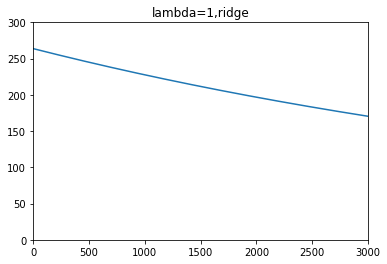

This is Ridge Regression,Choose lambdaa= 0.1
The answer is: 9863.584104241058


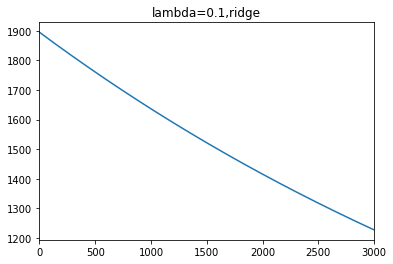

In [24]:
#ridge regression when lambda=1
ans_1_ridge=GD_ridge(A,x0,b,lambdaa=1,max_buchang=3000)[1]
f_star_1_ridge=f_ridge(A,x_,b,lambdaa=1)
chazhi_1_ridge=[]
for i in range(0,3001):
    chazhi_1_ridge.append((ans_1_ridge[i]-f_star_1_ridge)/f_star_1_ridge)
plt.title("lambda=1,ridge")
plt.xlim((0,3001))
plt.ylim((0,300))
plt.plot(buchang,chazhi_1_ridge)
plt.show()
#when lambda=0.1
ans_2_ridge=GD_ridge(A,x0,b,lambdaa=0.1,max_buchang=3000)[1]
f_star_2_ridge=f_ridge(A,x_,b,lambdaa=0.1)
chazhi_2_ridge=[]
for i in range(0,3001):
    chazhi_2_ridge.append((ans_2_ridge[i]-f_star_2_ridge)/f_star_2_ridge)
#plt.figure(2)
#plt.subplot(1,3,2)
plt.title("lambda=0.1,ridge")
plt.xlim((0,3001))
plt.plot(buchang,chazhi_2_ridge)
plt.show()

In [25]:
print(ans_1_ridge[0:100])

[15232.129684970603, 15229.880680117512, 15227.63203258517, 15225.383742316773, 15223.135809255557, 15220.88823334474, 15218.641014527571, 15216.394152747294, 15214.147647947166, 15211.901500070453, 15209.655709060426, 15207.41027486038, 15205.165197413598, 15202.920476663388, 15200.676112553061, 15198.43210502593, 15196.188454025341, 15193.945159494613, 15191.702221377102, 15189.459639616169, 15187.217414155175, 15184.975544937484, 15182.7340319065, 15180.492875005606, 15178.252074178194, 15176.01162936769, 15173.771540517497, 15171.531807571057, 15169.292430471798, 15167.053409163169, 15164.814743588635, 15162.57643369164, 15160.338479415677, 15158.100880704225, 15155.863637500766, 15153.626749748799, 15151.390217391847, 15149.154040373416, 15146.918218637038, 15144.68275212625, 15142.44764078459, 15140.212884555625, 15137.978483382904, 15135.744437210007, 15133.510745980522, 15131.277409638022, 15129.044428126108, 15126.811801388407, 15124.579529368513, 15122.347612010062, 15120.116

In [26]:
print(ans_2_ridge[0:100])

[15232.129684970603, 15229.880036596183, 15227.63074569587, 15225.381812212834, 15223.133236090263, 15220.885017271365, 15218.637155699333, 15216.389651317386, 15214.142504068755, 15211.89571389667, 15209.649280744372, 15207.403204555112, 15205.157485272164, 15202.91212283878, 15200.667117198243, 15198.422468293851, 15196.17817606889, 15193.93424046667, 15191.690661430503, 15189.447438903726, 15187.204572829645, 15184.96206315163, 15182.719909813024, 15180.478112757171, 15178.236671927461, 15175.995587267262, 15173.754858719962, 15171.514486228962, 15169.274469737647, 15167.034809189458, 15164.795504527805, 15162.55655569612, 15160.317962637855, 15158.07972529644, 15155.841843615346, 15153.604317538031, 15151.367147007988, 15149.130331968692, 15146.893872363637, 15144.657768136336, 15142.422019230291, 15140.186625589038, 15137.951587156087, 15135.716903874996, 15133.482575689308, 15131.248602542571, 15129.014984378367, 15126.781721140269, 15124.548812771847, 15122.31625921671, 15120.08

This is Ridge Regression,Choose lambdaa= 10
The answer is: 9878.59596775545


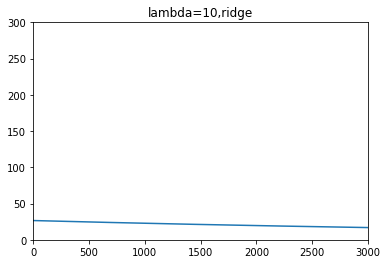

In [27]:
#when lambda=10
ans_3_ridge=GD_ridge(A,x0,b,lambdaa=10,max_buchang=3000)[1]
f_star_3_ridge=f_ridge(A,x_,b,lambdaa=10)
chazhi_3_ridge=[]
for i in range(0,3001):
    chazhi_3_ridge.append((ans_3_ridge[i]-f_star_3_ridge)/f_star_3_ridge)
plt.title("lambda=10,ridge")
plt.xlim((0,3001))
plt.ylim((0,300))
plt.plot(buchang,chazhi_3_ridge)
plt.show()

In [28]:
print(ans_3_ridge[0:100])

[15232.129684970603, 15229.887100172211, 15227.644871165798, 15225.40299789489, 15223.161480303039, 15220.9203183338, 15218.679511930719, 15216.439061037394, 15214.198965597387, 15211.959225554292, 15209.71984085171, 15207.480811433252, 15205.242137242527, 15203.003818223158, 15200.765854318784, 15198.528245473053, 15196.290991629608, 15194.054092732116, 15191.817548724246, 15189.581359549684, 15187.345525152105, 15185.110045475209, 15182.874920462704, 15180.640150058309, 15178.405734205746, 15176.171672848734, 15173.937965931042, 15171.704613396398, 15169.471615188568, 15167.238971251329, 15165.006681528439, 15162.7747459637, 15160.5431645009, 15158.311937083847, 15156.081063656355, 15153.850544162233, 15151.620378545334, 15149.39056674948, 15147.161108718521, 15144.93200439633, 15142.703253726762, 15140.47485665368, 15138.246813120993, 15136.01912307258, 15133.791786452339, 15131.564803204195, 15129.338173272055, 15127.111896599863, 15124.885973131532, 15122.660402811029, 15120.43518